In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate a dataset with 2 features (e.g., age and income)
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Convert the generated data to a pandas DataFrame
data = pd.DataFrame(X, columns=['age', 'income'])
data['purchase'] = y


In [2]:
data.head()

,age,income,purchase
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'income']], data['purchase'], test_size=0.25, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", report)


Accuracy: 0.96
Confusion Matrix:
 [[13  1]
 [ 0 11]]
Classification Report:
 {'0': {'precision': 1.0, 'recall': 0.9285714285714286, 'f1-score': 0.962962962962963, 'support': 14}, '1': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.9565217391304348, 'support': 11}, 'accuracy': 0.96, 'macro avg': {'precision': 0.9583333333333333, 'recall': 0.9642857142857143, 'f1-score': 0.9597423510466989, 'support': 25}, 'weighted avg': {'precision': 0.9633333333333333, 'recall': 0.96, 'f1-score': 0.9601288244766506, 'support': 25}}


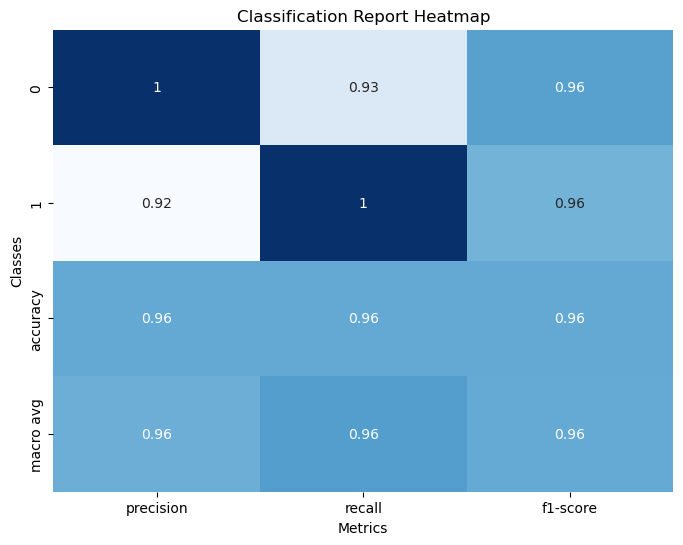

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the classification report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap to visualize the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()
